# Гистограмм плотности распределения Паретто 

'\n\xd0\x92\xd1\x8b\xd0\xb2\xd0\xbe\xd0\xb4 \xd0\xb4\xd0\xbb\xd1\x8f \xd0\xb1\xd0\xbe\xd0\xbb\xd1\x8c\xd1\x88\xd0\xb8\xd1\x85 \xd1\x80\xd0\xb0\xd0\xb7\xd0\xbc\xd0\xb5\xd1\x80\xd0\xb0\xd1\x85 \xd0\xb2\xd1\x8b\xd0\xb1\xd0\xbe\xd1\x80\xd0\xba\xd0\xb8 \xd0\xbe\xd1\x82\xd1\x86\xd0\xb5\xd0\xbd\xd0\xb0 \xd0\xb5\xd1\x91 \xd0\xbf\xd0\xbe\xd0\xba\xd0\xb0\xd0\xb7\xd0\xb0\xd1\x82\xd0\xb5\xd0\xbb\xd0\xb5\xd0\xb9 \xd0\xb2\xd1\x81\xd1\x91 \xd0\xb1\xd0\xbe\xd0\xbb\xd0\xb5\xd0\xb5 \xd1\x82\xd0\xbe\xd1\x87\xd0\xbd\xd0\xbe \xd0\xbf\xd0\xb8\xd1\x81\xd1\x8b\xd0\xb2\xd0\xb0\xd0\xb5\xd1\x82\xd1\x81\xd1\x8f \xd0\xbd\xd0\xbe\xd1\x80\xd0\xbc\xd0\xb0\xd0\xbb\xd1\x8c\xd0\xbd\xd1\x8b\xd0\xbc \xd1\x80\xd0\xb0\xd1\x81\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xb5\xd0\xbb\xd0\xb5\xd0\xbd\xd0\xb8\xd0\xb5\xd0\xbc\n'

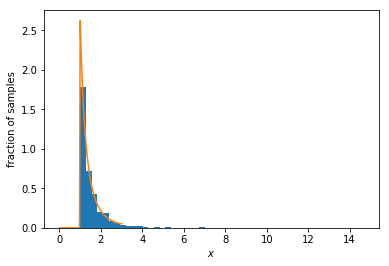

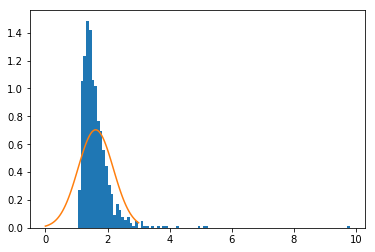

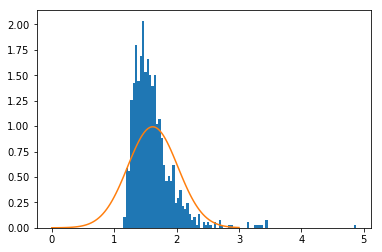

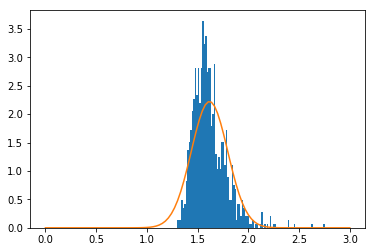

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

b = 2.62
pareto = sts.pareto(b)
sample = pareto.rvs(size=1000)
plt.hist(sample,bins=50, normed=True)

x = np.linspace(0,3,100)
pdf = pareto.pdf(x)
plt.plot(x, pdf)

plt.ylabel('fraction of samples')
plt.xlabel('$x$')

"""
Цикл для генерации выборок размером 5 10 50
"""

for N in [5, 10, 50]:
    gmeans = []
    for i in range(0, 1000):
        """
        Генерируется 1000 выборок размера N
        """
        tempSample = pareto.rvs(size=N)
        """
        Записываем их среднее в массив
        """
        gmeans.append(np.mean(tempSample))
    
    """
    Создаем новый плот для вывода графика на отдельной канве
    """
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    
    """
    Строим гисторгамму распределения для соответствующего N
    """
    ax2.hist(gmeans,bins=100, normed=True, label='s_mean_distrib')

    mu =pareto.mean()
    sigma = sqrt(pareto.var()/N)
    norm_rv = sts.norm(loc=mu, scale=sigma)
    pdf = norm_rv.pdf(x)
    ax2.plot(x, pdf, label='theoretical pdf');
    
"""
Вывод для больших размерах выборки отцена её показателей всё более точно писывается нормальным распределением
"""